# 成绩判定合格与否_逻辑回归

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'E2')

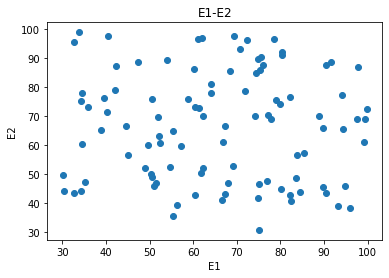

In [7]:
# using matplotlib visulization
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:, 'Exam1'], data.loc[:, 'Exam2'])
plt.title('E1-E2')
plt.xlabel('E1')
plt.ylabel('E2')
plt.show()

In [9]:
mask = data.loc[:, 'Pass'] == 1
print(mask)

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Pass, Length: 100, dtype: bool


<function matplotlib.pyplot.show(close=None, block=None)>

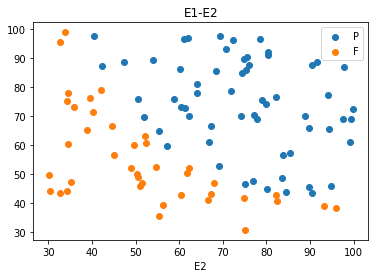

In [10]:
fig2 = plt.figure()
passed = plt.scatter(data.loc[:, 'Exam1'][mask], data.loc[:, 'Exam2'][mask])
failed = plt.scatter(data.loc[:, 'Exam1'][~mask], data.loc[:, 'Exam2'][~mask])
plt.title('E1-E2')
plt.xlabel('E1')
plt.xlabel('E2')
plt.legend((passed, failed),('P', 'F'))
plt.show


In [13]:
x = data.drop(['Pass'], axis=1)
y = data.loc[:,'Pass']
x1 = data.loc[:,'Exam1']
x2 = data.loc[:,'Exam2']
x1.head()


(100, 2) (100,)


In [ ]:
print(x.shape, y.shape)

In [15]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x, y)


LogisticRegression()

In [16]:
y_predict = LR.predict(x)
print(y_predict)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [17]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, y_predict)
print(acc)


0.89


In [18]:
LR.intercept_

array([-25.05219314])

In [19]:
theta0 = LR.intercept_
theta1, theta2 = LR.coef_[0][0],LR.coef_[0][1]
print(theta0,theta1,theta2)

[-25.05219314] 0.20535491217790383 0.20058380395469044


In [20]:
x2_new = -(theta0+theta1*x1)/theta2
print(x2_new)


0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64


In [ ]:
fig3 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask], data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask], data.loc[:,'Exam2'][~mask])
plt.plot(x1,x2_new)
plt.title('E1_E2')
plt.xlabel('E1')
plt.ylabel('E2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()

In [ ]:
x1_2 = x1*x1
x2_2 = x2*x2
x1_x2 = x1*x2
x_new = {'x1':x1, 'x2':x2, 'x1_2':x1_2, 'x2_2':x2_2, 'x1_x2':x1_x2}
x_new = pd.DataFrame(x_new)
print(x_new)


In [23]:
LR2 = LogisticRegression()
LR2.fit(x_new, y)

LogisticRegression()

In [26]:
y2_predict = LR2.predict(x_new)
print(y2_predict)
acc2 = accuracy_score(y, y2_predict)
print(acc2)
x1_new = x1.sort_values()
print(x1_new)

[0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]
1.0
63    30.058822
1     30.286711
57    32.577200
70    32.722833
36    33.915500
        ...    
56    97.645634
47    97.771599
51    99.272527
97    99.315009
75    99.827858
Name: Exam1, Length: 100, dtype: float64


In [27]:
theta0 = LR2.intercept_
theta1, theta2, theta3, theta4, theta5 = LR2.coef_[0][0],LR2.coef_[0][1], LR2.coef_[0][2], LR2.coef_[0][3],LR2.coef_[0][4]
a = theta4
b = theta5*x1_new+theta2
c = theta0+theta1*x1_new+theta3*x1_new*x1_new
x2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(a*2)
print(x2_new_boundary)


63    132.124249
1     130.914667
57    119.415258
70    118.725082
36    113.258684
         ...    
56     39.275712
47     39.251001
51     38.963585
97     38.955634
75     38.860426
Name: Exam1, Length: 100, dtype: float64


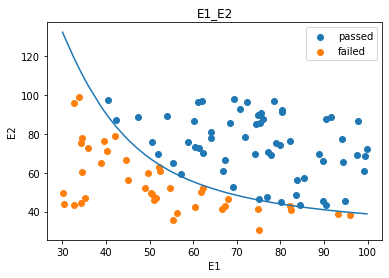

In [28]:
fig4 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask], data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask], data.loc[:,'Exam2'][~mask])
plt.plot(x1_new,x2_new_boundary)
plt.title('E1_E2')
plt.xlabel('E1')
plt.ylabel('E2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()